In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import helmet
from helmet import HelmetConfig
from helmet import train
from helmet import detect_and_color_splash

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to trained weights file
COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

COMMAND = 'train'   # Update to 'train' or 'inference'
HELMET_DIR = os.path.join(ROOT_DIR, "datasets/helmet")  # Update - Required for'train'
IMAGE_FILE = os.path.join(ROOT_DIR, "datasets/helmet/va/VID_20200315_181352_frame0.jpg") # Update - Required for 'inference'
VIDEO_FILE = None # either IMAGE_FILE or VIDEO_FILE required

# Update to 'coco' or 'last' - use the last generated weights or specify the weights file path
WEIGHTS = 'coco'  
# WEIGHTS = 'last'  
# WEIGHTS = os.path.join(ROOT_DIR, "mask_rcnn_helmet.h5") 

# Set to False if needs to be 'Motorcyclist_with_Helmet' or 'without_Helmet' instead
helmet.DEFAULT_LABEL_HELMET_SEPARATE = True 

helmet.NBR_OF_EPOCHS = 5

Using TensorFlow backend.


In [11]:
# Configurations

class InferenceConfig(HelmetConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

if COMMAND == "train":
    config = HelmetConfig()
else:
    config = InferenceConfig()
helmet.config = config
config.display()

# Create model
if COMMAND == "train":
    model = modellib.MaskRCNN(mode="training", config=config,
                              model_dir=MODEL_DIR)
    print ('Model loaded for training')
else:
    model = modellib.MaskRCNN(mode="inference", config=config,
                              model_dir=MODEL_DIR)
    print ('Model loaded for inference')



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [3]:
# Select weights file to load
if WEIGHTS == "coco":
    weights_path = COCO_WEIGHTS_PATH
    # Download weights file
    if not os.path.exists(weights_path):
        utils.download_trained_weights(weights_path)
elif WEIGHTS == "last":
    # Find last trained weights
    weights_path = model.find_last()
elif WEIGHTS == "imagenet":
    # Start from ImageNet trained weights
    weights_path = model.get_imagenet_weights()
else:
    weights_path = WEIGHTS
print (f'Weights file selected for {WEIGHTS}')

# Load weights
print("Loading weights ", weights_path)
if WEIGHTS == "coco":
    # Exclude the last layers because they require a matching
    # number of classes
    model.load_weights(weights_path, by_name=True, exclude=[
        "mrcnn_class_logits", "mrcnn_bbox_fc",
        "mrcnn_bbox", "mrcnn_mask"])
else:
    model.load_weights(weights_path, by_name=True)

print(f'{weights_path} weights loaded')

Weights file selected for coco
Loading weights  D:\Downloads\Helmet_Mask_RCNN\mask_rcnn_coco.h5
D:\Downloads\Helmet_Mask_RCNN\mask_rcnn_coco.h5 weights loaded


In [4]:
# Train or evaluate
if COMMAND == "train":
    train(model, HELMET_DIR)
elif COMMAND == "inference":
    detect_and_color_splash(model, image_path=IMAGE_FILE,
                            video_path=VIDEO_FILE)
else:
    print("'{}' is not recognized. "
          "Use 'train' or 'inference'".format(COMMAND))



***********Dataset statistics for train***********
Number of Images     149
class info           {'Motorcyclist': 1, 'Helmet': 2}
Nbr of Instances     {'Motorcyclist': 646, 'Helmet': 396}
Nbr of ignored Instances 38


************Dataset statistics for val************
Number of Images     43
class info           {'Motorcyclist': 1, 'Helmet': 2}
Nbr of Instances     {'Motorcyclist': 129, 'Helmet': 61}
Nbr of ignored Instances 13

Training network heads

Starting at epoch 0. LR=0.001

Checkpoint Path: D:\Downloads\Helmet_Mask_RCNN\logs\helmet20200509T1224\mask_rcnn_helmet_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv

C:\Users\rajas\.conda\envs\MaskRCNN\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
100/100 [==============================] - 424s 4s/step - loss: 1.6367 - rpn_class_loss: 0.0621 - rpn_bbox_loss: 0.5432 - mrcnn_class_loss: 0.2723 - mrcnn_bbox_loss: 0.3866 - mrcnn_mask_loss: 0.3725 - val_loss: 1.7884 - val_rpn_class_loss: 0.1016 - val_rpn_bbox_loss: 0.9601 - val_mrcnn_class_loss: 0.1307 - val_mrcnn_bbox_loss: 0.2596 - val_mrcnn_mask_loss: 0.3364
Epoch 2/5
100/100 [==============================] - 370s 4s/step - loss: 1.1438 - rpn_class_loss: 0.0388 - rpn_bbox_loss: 0.4369 - mrcnn_class_loss: 0.1554 - mrcnn_bbox_loss: 0.2188 - mrcnn_mask_loss: 0.2940 - val_loss: 1.4863 - val_rpn_class_loss: 0.1140 - val_rpn_bbox_loss: 0.7452 - val_mrcnn_class_loss: 0.1437 - val_mrcnn_bbox_loss: 0.2039 - val_mrcnn_mask_loss: 0.2795
Epoch 3/5
100/100 [==============================] - 368s 4s/step - loss: 1.0115 - rpn_class_loss: 0.0387 - rpn_bbox_loss: 0.3773 - mrcnn_class_loss: 0.1416 - mrcnn_bbox_loss: 0.1808 - mrcnn_mask_loss: 0.2731 - val_loss: 1.5125 - val_rpn_class_loss

## Run Detection

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline 

In [6]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [19]:
# Set to inference configuration
config = InferenceConfig()
helmet.config = config

# Load model in inference mode
model = modellib.MaskRCNN(mode="inference", config=config,
                          model_dir=MODEL_DIR)

# Find last trained weights
weights_path = model.find_last()

# Load weights
model.load_weights(weights_path, by_name=True)
print(f'{weights_path} weights loaded')

# Load validation dataset
dataset = helmet.HelmetDataset()
dataset.load_helmet(HELMET_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))


Re-starting from epoch 5
D:\Downloads\Helmet_Mask_RCNN\logs\helmet20200509T1224\mask_rcnn_helmet_0005.h5 weights loaded

************Dataset statistics for val************
Number of Images     43
class info           {'Motorcyclist': 1, 'Helmet': 2}
Nbr of Instances     {'Motorcyclist': 129, 'Helmet': 61}
Nbr of ignored Instances 13

Images: 43
Classes: ['BG', 'Motorcyclist', 'Helmet']


proposals                shape: (1, 1000, 4)          min:    0.00000  max:    1.00000  float32
probs                    shape: (1, 1000, 3)          min:    0.00000  max:    1.00000  float32
deltas                   shape: (1, 1000, 3, 4)       min:   -3.56231  max:    3.85471  float32
masks                    shape: (1, 100, 28, 28, 3)   min:    0.00002  max:    0.99929  float32
detections               shape: (1, 100, 6)           min:    0.00000  max:    2.00000  float32
6 detections: ['Motorcyclist' 'Motorcyclist' 'Motorcyclist' 'Motorcyclist' 'Helmet'
 'Helmet']


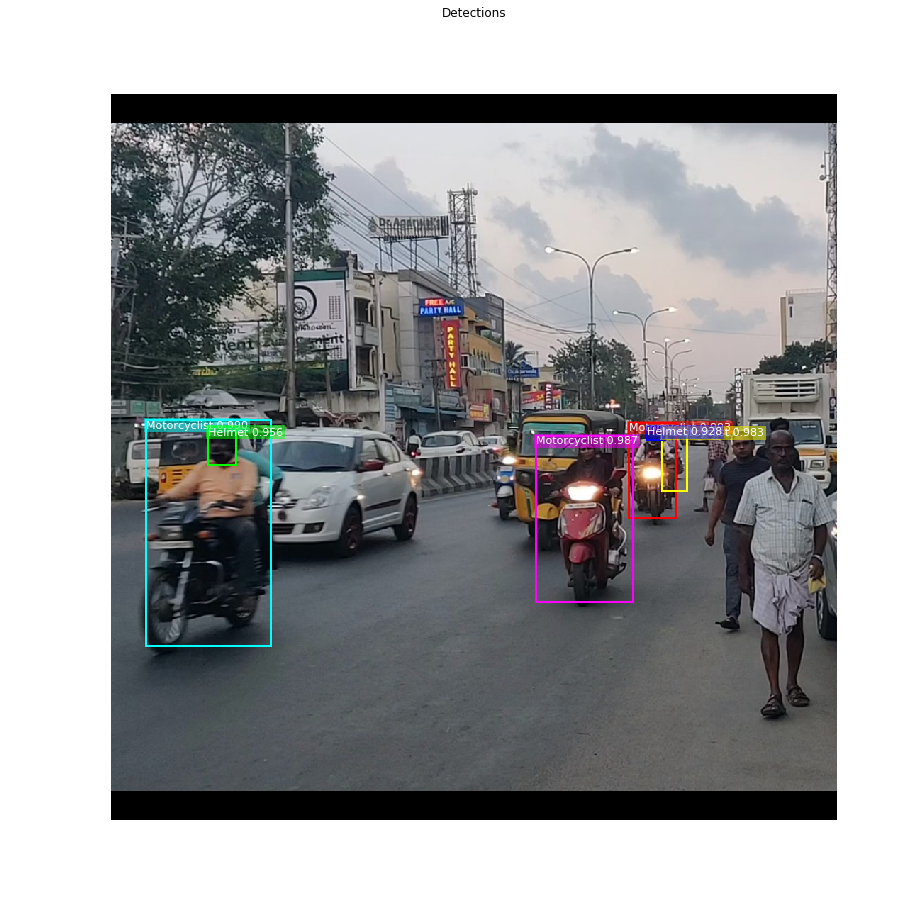

In [17]:
# Get input and output to classifier and mask heads.
mrcnn = model.run_graph([image], [
    ("proposals", model.keras_model.get_layer("ROI").output),
    ("probs", model.keras_model.get_layer("mrcnn_class").output),
    ("deltas", model.keras_model.get_layer("mrcnn_bbox").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
])

# Get detection class IDs. Trim zero padding.
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]
detections = mrcnn['detections'][0, :det_count]

print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

captions = ["{} {:.3f}".format(dataset.class_names[int(c)], s) if c > 0 else ""
            for c, s in zip(detections[:, 4], detections[:, 5])]
visualize.draw_boxes(
    image, 
    refined_boxes=utils.denorm_boxes(detections[:, :4], image.shape[:2]),
    visibilities=[2] * len(detections),
    captions=captions, title="Detections",
    ax=get_ax())

image ID: helmet.VID_20200315_181352_frame0.jpg (29) D:\Downloads\Helmet_Mask_RCNN\datasets/helmet\val\VID_20200315_181352_frame0.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (9,)                  min:    1.00000  max:    2.00000  int32
gt_bbox                  shape: (9, 4)                min:   41.00000  max:  809.00000  int32
gt_mask                  shape: (1024, 1024, 9)       min:    0.00000  max:    1.00000  bool


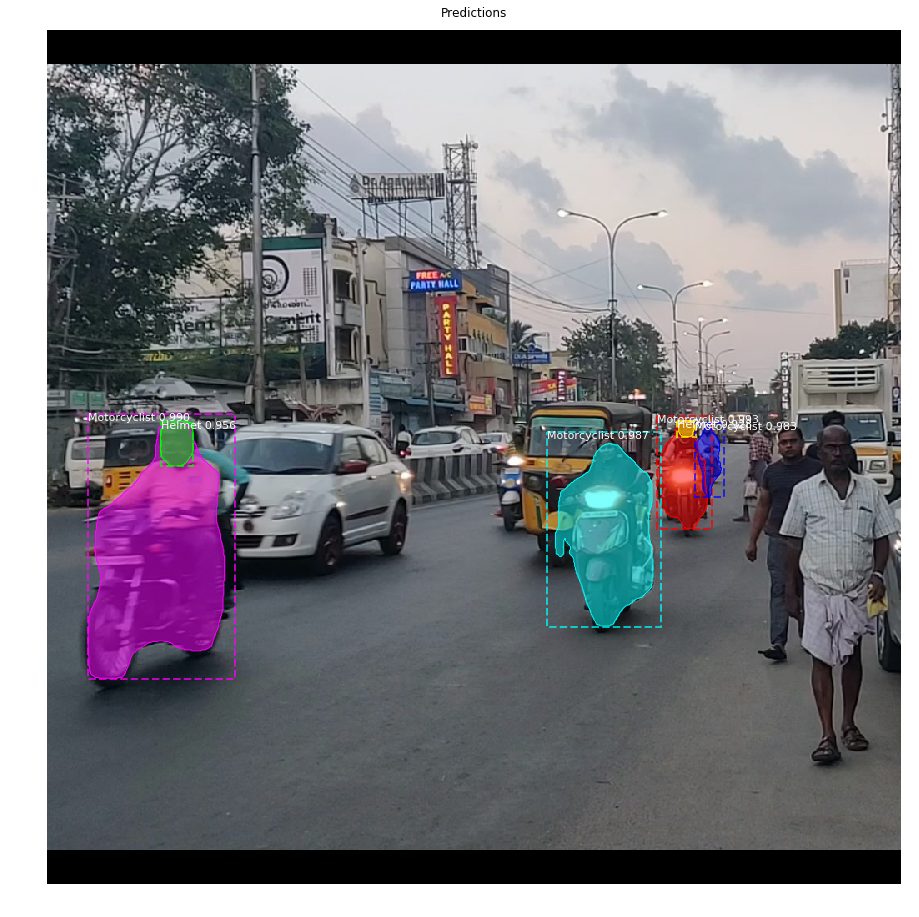

In [18]:
#image_id = random.choice(dataset.image_ids)
image_id = [i for i,_ in enumerate(dataset.image_info) if _['id'] == 'VID_20200315_181352_frame0.jpg'][0]
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

### Compute mAP @ IoU=50 on Batch of Images

In [15]:
# Compute VOC-style Average Precision
def compute_batch_ap(image_ids):
    APs = []
    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset, config,
                                   image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect([image], verbose=0)
        # Compute AP
        r = results[0]
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                              r['rois'], r['class_ids'], r['scores'], r['masks'])
        APs.append(AP)
    return APs

# Pick a set of random images
image_ids = np.random.choice(dataset.image_ids, 10)
APs = compute_batch_ap(image_ids)
print("mAP @ IoU=50: ", np.mean(APs))

mAP @ IoU=50:  0.5596825455625851
